# 有限体上の楕円曲線上の点の演算

　楕円曲線 $E:y^2=x^3+ax+b$ 上の相異なる2点 $P(x_1,y_1)$ と点 $Q(x_2,y_2)$ の2点を通る直線 $L$ の方程式は，
$x_1\ne x_2$の場合, 
$$y−y_1=\frac{y_1−y_2}{x_1-x_2}(x-x_1)$$
であり，楕円曲線 $E$ と直線 $L$ との交点の $x$座標は，次の3次方程式
$$\left(\frac{y_1−y_2}{x_1-x_2}(x-x_1)+y_1\right)^2=x^3+ax+b$$
を満たす。$x_1,\ x_2$ は当然この方程式を満たす筈である。

　3次方程式だから, $x_3$もこの方程式の解であるとすれば, 
$$(x-x_1)(x-x_2)(x-x_3)=0$$
と同じ方程式であるはずだから, $x^2$ の係数は $x_1+x_2+x_3$ となるはずだ。

　そこで, $x^2$ の係数を比べてみれば, 
$$ \left(\frac{y_1-y_2}{x_1-x_2}\right)^2=x_1+x_2+x_3$$
つまり, 
$$ x_3=\left(\frac{y_1-y_2}{x_1-x_2}\right)^2-(x_1+x_2)$$
と分かり,  $\displaystyle{y_3=\frac{y_1−y_2}{x_1-x_2}(x_3-x_1)+y_1}$ という事になる。

　$x_1=x_2$ の場合は,  $y_1\ne y_2$ の場合は, 2点を通る直線 $L$ の方程式は $x=x_1$ だから, 
同様に3つ目の点の座標を $(x_3,\ y_3)$ とすれば,  $x_3=x_1$ であり, $E:y^2=x^3+ax+b$ に代入して, 
$y^2=x_1^3+ax_1+b$ の $y$ の正負の解が, $y_1,\ y_2$ なので, $y_3$ はそのいずれでもないとすると無限遠点となる。

　$x_1=x_2$ で $y_1=y_2$ の場合は, $L$ は $E:y^2=x^3+ax+b$ 上の点 $(x_1,\ y_1)$ での接線を考える事となる。
$E$ の両辺を $x$ で微分すれば, 
$$ 2yy'=3x^2+a$$
$$ y'=\frac{3x^2+a}{2y}$$
だから, 点$(x_1,\ y_1)$での接線 $L$ の傾きは, $\displaystyle{\frac{{3x_1}^2+a}{2y_1}}$ で得られる。

　したがって, 接線 $L$ の方程式は, 
$$y−y_1=\frac{{3x_1}^2+a}{2y_1}(x-x_1)$$
となり, 同様の議論で, 楕円曲線 $E$ と直線 $L$ との共有点の $x$座標は，次の3次方程式
$$\left(\frac{{3x_1}^2+a}{2y_1}(x-x_1)+y_1\right)^2=x^3+ax+b$$
を満たす。$x_1$ は当然この方程式の重解となるということだ。

　3次方程式だから, $x_3$もこの方程式の解であるとすれば, 
$$(x-x_1)(x-x_1)(x-x_3)=0$$
と同じ方程式であるはずだから, $x^2$ の係数は $x_1+x_1+x_3=2x_1+x_3$ となるはずだ。

 そこで, $x^2$ の係数を比べてみれば, 
$$ \left(\frac{{3x_1}^2+a}{2y_1}\right)^2=2x_1+x_3$$
つまり, 
$$ x_3=\left(\frac{{3x_1}^2+a}{2y_1}\right)^2-2x_1$$
と分かり,  $\displaystyle{y_3=\frac{{3x_1}^2+a}{2y_1}(x_3-x_1)+y_1}$ という事になる。

　最後に $x_1=x_2$ だが $y_1\ne y_2$ という場合だ。この場合, 楕円曲線の形状より, 3つ目の共有点は「ない」と判断するところだろうが, ここに無限遠点を加えてそれを3つ目の共有点とする。つまり, $(x_3,\ y_3)=(\infty,\ \infty)$ というわけだ。
座標で扱うと気持ち悪いので, $(x_3,\ y_3)=\infty$ でも良い。
ただ, 以下のように プログラムで扱う場合は, どうしても $(\infty,\ \infty)$ となるのだろう。

In [2]:
using Plots,ImplicitEquations,LaTeXStrings,ImplicitPlots

In [3]:
p,a,b=17,5,-5
f(x, y) = y^2 - (x^3 +a*x + b)
ff(x, y,k) = y^2 - (x^3 +a*x + b)+k*p
function ffdiv(a,b)
    ans=0
    while (ans*b)%p!=a%p && ans<p
        ans=ans+1
    end
    if ans>=p
        return -1
    else
        return ans
    end
end

ffdiv (generic function with 1 method)

In [4]:
for a in 1:p-1
    divl=[]
    for b in 1:p-1
        append!(divl,ffdiv(a,b))
    end
#    println(divl)
end

In [5]:
function EllPlus(pp,qq)# 無限遠点は[Inf,Inf]で, 但し, Inf=1/0で
    if pp[1]!=qq[1]
        m=ffdiv(qq[2]-pp[2],qq[1]-pp[1])
#        println("m = ",m)
        x=(m^2-(pp[1]+qq[1])+10*p)%p
#        println("x = ",x)
    else
        if pp[2]==qq[2]
            m=ffdiv((3*pp[1]^2+a+10*p)%p,(2*pp[2])%p)
#            println("** m = ",[(3*pp[1]^2+a+10*p)%p,(2*pp[2])%p,m])
            x=(m^2-2*pp[1]+10*p)%p
#            println("** x = ",x)
        else
            x=1/0
        end
    end
    if x>0 && x!=1/0
        y=(p*p-(m*(x-pp[1])+pp[2]))%p
    else 
        y=1/0
    end
    return [x,y]
end

EllPlus (generic function with 1 method)

In [6]:
plst=[]
for x in 0:p-1,y in 0:p-1
    if f(x,y)%p==0
        append!(plst,[[x,y]])
    end
end
println(plst)

Any[[1, 1], [1, 16], [2, 8], [2, 9], [5, 3], [5, 14], [7, 4], [7, 13], [9, 2], [9, 15], [10, 5], [10, 12], [11, 2], [11, 15], [12, 7], [12, 10], [13, 8], [13, 9], [14, 2], [14, 15]]


In [7]:
pp,qq=[1,1],[1,1]
while qq[1]!=1/0
    rr=EllPlus(pp,qq)
    println(pp,"+",qq,"=",rr)
    pp=qq
    qq=rr
end

[1, 1]+[1, 1]=[14, 15]
[1, 1]+[14, 15]=[10, 5]
[14, 15]+[10, 5]=[12, 7]
[10, 5]+[12, 7]=[13, 9]
[12, 7]+[13, 9]=[13, 8]
[13, 9]+[13, 8]=[Inf, Inf]


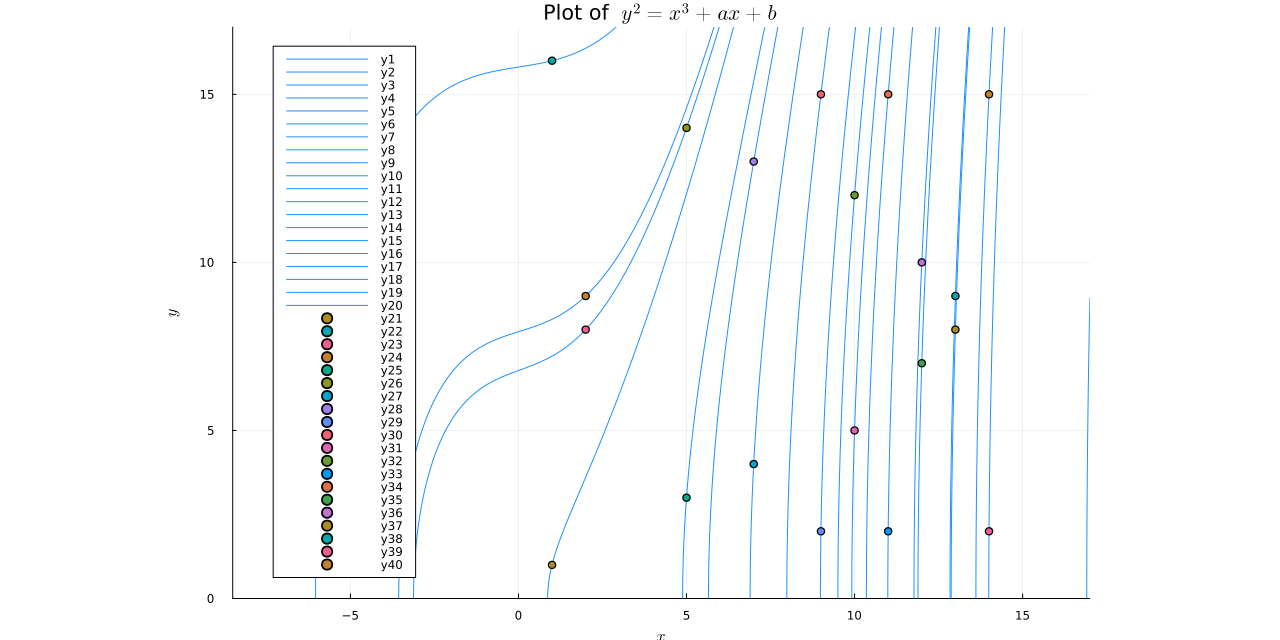

In [46]:
# プロット
#contour(-p:0.1:p,-p:0.1:p,(x,y)->f(x,y), levels=[0], xlabel=L"x", ylabel=L"y", title="Plot of  "*L"y^2= x^3 +ax + b",c= :blue)
#pl=plot(Eq(f,0),xlims=(-p, p),ylims=(0, p),aspect_ratio=:equal,size=(1280,640),c=:blue,xlabel=L"x", ylabel=L"y",title="Plot of  "*L"y^2 = x^3 +a x + b")
#p1=plot(f ⩵ 0,xlims=(-p, p),ylims=(0, p), size=(1280,640),aspect_ratio=:equal,c=:blue,xlabel=L"x", ylabel=L"y",title="Plot of  "*L"y^2 = x^3 +a x + b")
p1=implicit_plot(f,xlims=(-p/2, p),ylims=(0, p), size=(1280,640),aspect_ratio=:equal,c=:blue,xlabel=L"x", ylabel=L"y",title="Plot of  "*L"y^2 = x^3 +a x + b")
for k in -2*p:p*p
    f(x, y) = y^2 - (x^3 +a*x + b)+k*p
    chk=false
    for e in plst
        x,y=e[1],e[2]
        if f(x,y)==0
            chk=true
            break
        end
    end
    if chk
        implicit_plot!(f,xlims=(-p/2, p),ylims=(0, p), size=(1280,640),aspect_ratio=:equal,c=:blue,xlabel=L"x", ylabel=L"y",title="Plot of  "*L"y^2 = x^3 +a x + b")
    end
#    plot!(Eq(f,p*i),xlims=(-p, p),ylims=(0, p), size=(1280,640),aspect_ratio=:equal,c=:blue,xlabel=L"x", ylabel=L"y",title="Plot of  "*L"y^2 = x^3 +a x + b")
end
for i in 1:length(plst)
    px,py=plst[i][1],plst[i][2]
    scatter!([px],[py])
end
#scatter!([plst[6][1]-p],[plst[6][2]])
#savefig("20241007EllipA.png")
plot(p1)